In [1]:
#
# hw5pr3 predicting restaurant scores based on inspection characteristics
#

In [3]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [4]:
# for read_csv, use header=0 when row 0 is a header row
# 
filename = 'restuarant.csv'
df = pd.read_csv(filename, header=0)   # encoding="latin1" et al.
print(f"{filename} : file read into a pandas dataframe.")

restuarant.csv : file read into a pandas dataframe.


In [5]:
#
# a dataframe is a "spreadsheet in Python"   (seems to have an extra column!)
#
pd.set_option('display.max_rows', 10)     # None for no limit; default: 10
df.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,835,Kam Po Kitchen,801 Broadway St,San Francisco,CA,94133,37.797223,-122.410513,POINT (-122.410513 37.797223),NaN,...,88.0,Routine - Unscheduled,835_20180917_103139,Improper food storage,Low Risk,107.0,107.0,6.0,3.0,6.0
1,905,Working Girls' Cafe',0259 Kearny St,San Francisco,CA,94108,37.790477,-122.404033,POINT (-122.404033 37.790477),NaN,...,87.0,Routine - Unscheduled,905_20190415_103114,High risk vermin infestation,High Risk,19.0,19.0,6.0,3.0,8.0
2,1203,TAWAN'S THAI FOOD,4403 GEARY Blvd,San Francisco,CA,94118,37.780834,-122.466590,POINT (-122.46659 37.780834),1.415576e+10,...,77.0,Routine - Unscheduled,1203_20170803_103120,Moderate risk food holding temperature,Moderate Risk,5.0,5.0,8.0,4.0,11.0
3,1345,Cordon Bleu,1574 California St,San Francisco,CA,94109,37.790683,-122.420264,POINT (-122.420264 37.790683),NaN,...,81.0,Routine - Unscheduled,1345_20170928_103105,Improper cooling methods,High Risk,105.0,105.0,4.0,3.0,21.0
4,1352,LA TORTILLA,495 Castro St B,San Francisco,CA,94114,37.760954,-122.434935,POINT (-122.434935 37.760954),1.415586e+10,...,74.0,Routine - Unscheduled,1352_20180620_103177,Non service animal,Low Risk,38.0,38.0,3.0,5.0,5.0


In [6]:
#
# let's look at our pandas dataframe
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   business_id                   53973 non-null  int64  
 1   business_name                 53973 non-null  object 
 2   business_address              53973 non-null  object 
 3   business_city                 53973 non-null  object 
 4   business_state                53973 non-null  object 
 5   business_postal_code          52787 non-null  object 
 6   business_latitude             27475 non-null  float64
 7   business_longitude            27475 non-null  float64
 8   business_location             27460 non-null  object 
 9   business_phone_number         17672 non-null  float64
 10  inspection_id                 53973 non-null  object 
 11  inspection_date               53973 non-null  object 
 12  inspection_score              39541 non-null  float64
 13  i

In [8]:
# Add month, day, year columns to dataframe 
myList = [date.split('/') for date in df['inspection_date']]
df['month'] = [int(date[0]) for date in myList]
df['day'] = [int(date[1]) for date in myList]
df['year'] = [int(date[2][:5]) for date in myList]
df.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,violation_description,risk_category,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,month,day,year
0,835,Kam Po Kitchen,801 Broadway St,San Francisco,CA,94133,37.797223,-122.410513,POINT (-122.410513 37.797223),NaN,...,Improper food storage,Low Risk,107.0,107.0,6.0,3.0,6.0,9,17,2018
1,905,Working Girls' Cafe',0259 Kearny St,San Francisco,CA,94108,37.790477,-122.404033,POINT (-122.404033 37.790477),NaN,...,High risk vermin infestation,High Risk,19.0,19.0,6.0,3.0,8.0,4,15,2019
2,1203,TAWAN'S THAI FOOD,4403 GEARY Blvd,San Francisco,CA,94118,37.780834,-122.466590,POINT (-122.46659 37.780834),1.415576e+10,...,Moderate risk food holding temperature,Moderate Risk,5.0,5.0,8.0,4.0,11.0,8,3,2017
3,1345,Cordon Bleu,1574 California St,San Francisco,CA,94109,37.790683,-122.420264,POINT (-122.420264 37.790683),NaN,...,Improper cooling methods,High Risk,105.0,105.0,4.0,3.0,21.0,9,28,2017
4,1352,LA TORTILLA,495 Castro St B,San Francisco,CA,94114,37.760954,-122.434935,POINT (-122.434935 37.760954),1.415586e+10,...,Non service animal,Low Risk,38.0,38.0,3.0,5.0,5.0,6,20,2018


In [9]:
#
# ok!  let's drop columns that are
#      + "cheating"  (they give away the answer and wouldn't be available)
#      + too sparse  (too many NAs)
#
# Dropping inspection_type because ones without Routine - Unscheduled have no inspection score
toDrop = ['business_id', 'business_name', 'business_address', 'business_city',
          'business_state', 'business_phone_number', 
          'business_phone_number', 'business_location', 
          'inspection_id', 'inspection_date', 'violation_id', 'SF Find Neighborhoods', 
          'Neighborhoods', 'inspection_type']
maybeDrop = ['business_latitude', 'business_longitude']

df_clean = df.drop(toDrop + maybeDrop, axis=1)     # or, axis = 1 indicates we want to drop a column, not a row

# let's see what's there...
df_clean.info()  # re-look at the data ...    
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   business_postal_code          52787 non-null  object 
 1   inspection_score              39541 non-null  float64
 2   violation_description         40253 non-null  object 
 3   risk_category                 40253 non-null  object 
 4   Current Police Districts      27447 non-null  float64
 5   Current Supervisor Districts  27447 non-null  float64
 6   Analysis Neighborhoods        27447 non-null  float64
 7   month                         53973 non-null  int64  
 8   day                           53973 non-null  int64  
 9   year                          53973 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 4.1+ MB


,business_postal_code,inspection_score,violation_description,risk_category,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,month,day,year
0,94133,88.0,Improper food storage,Low Risk,6.0,3.0,6.0,9,17,2018
1,94108,87.0,High risk vermin infestation,High Risk,6.0,3.0,8.0,4,15,2019
2,94118,77.0,Moderate risk food holding temperature,Moderate Risk,8.0,4.0,11.0,8,3,2017
3,94109,81.0,Improper cooling methods,High Risk,4.0,3.0,21.0,9,28,2017
4,94114,74.0,Non service animal,Low Risk,3.0,5.0,5.0,6,20,2018


In [10]:
#
# typically, after dropping columns we don't want, 
#   we drop rows with missing data (other approaches are possible, too)
#
df_full = df_clean.dropna()   # this removes all rows with missing data ("na")
df_full.info()                # it's "full" because it has no missing data
df_full

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20321 entries, 0 to 38177
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   business_postal_code          20321 non-null  object 
 1   inspection_score              20321 non-null  float64
 2   violation_description         20321 non-null  object 
 3   risk_category                 20321 non-null  object 
 4   Current Police Districts      20321 non-null  float64
 5   Current Supervisor Districts  20321 non-null  float64
 6   Analysis Neighborhoods        20321 non-null  float64
 7   month                         20321 non-null  int64  
 8   day                           20321 non-null  int64  
 9   year                          20321 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 1.7+ MB


,business_postal_code,inspection_score,violation_description,risk_category,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,month,day,year
0,94133,88.0,Improper food storage,Low Risk,6.0,3.0,6.0,9,17,2018
1,94108,87.0,High risk vermin infestation,High Risk,6.0,3.0,8.0,4,15,2019
2,94118,77.0,Moderate risk food holding temperature,Moderate Risk,8.0,4.0,11.0,8,3,2017
3,94109,81.0,Improper cooling methods,High Risk,4.0,3.0,21.0,9,28,2017
4,94114,74.0,Non service animal,Low Risk,3.0,5.0,5.0,6,20,2018
...,...,...,...,...,...,...,...,...,...,...
38162,94118,94.0,Improper storage of equipment utensils or linens,Low Risk,8.0,4.0,11.0,10,26,2018
38165,94112,90.0,Moderate risk food holding temperature,Moderate Risk,9.0,1.0,7.0,4,30,2018
38167,94103,96.0,Inadequate warewashing facilities or equipment,Low Risk,3.0,2.0,20.0,7,31,2017
38172,94103,93.0,Improper cooling methods,High Risk,1.0,10.0,20.0,1,5,2017


In [11]:
# Get unique types for string columns
violationDescriptions = df_full['violation_description'].unique()
violationDescriptions

array(['Improper food storage', 'High risk vermin infestation',
       'Moderate risk food holding temperature',
       'Improper cooling methods', 'Non service animal',
       'Low risk vermin infestation', 'Other low risk violation',
       'Food in poor condition', 'Improper thawing methods',
       'Unclean nonfood contact surfaces',
       'Improper or defective plumbing',
       'Moderate risk vermin infestation',
       'Foods not protected from contamination',
       'Improper storage of equipment utensils or linens',
       'Unapproved or unmaintained equipment or utensils',
       'Inadequate and inaccessible handwashing facilities',
       'Wiping cloths not clean or properly stored or inadequate sanitizer',
       'Inadequately cleaned or sanitized food contact surfaces',
       'High risk food holding temperature',
       'Unclean or degraded floors walls or ceilings',
       'Unclean or unsanitary food contact surfaces',
       'No thermometers or uncalibrated thermometer

In [12]:
#
# everything needs to be numeric! we'll convert female/male to 1/0
#
violationDescriptions = list(df_full['violation_description'].unique())

def numberizeInspectionDescription(stringIn):
    """ converts violation Descriptions to numbers """
    if stringIn in violationDescriptions: return violationDescriptions.index(stringIn)
    else:  return -1                   # or return int(s=='female')


df_full['violation_description'] = df_full['violation_description'].apply(numberizeInspectionDescription)

# can't run this cell twice!   (we've replaced things!)

<ipython-input-12-f90c09bd8463>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['violation_description'] = df_full['violation_description'].apply(numberizeInspectionDescription)


In [13]:
df_full.head()

,business_postal_code,inspection_score,violation_description,risk_category,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,month,day,year
0,94133,88.0,0,Low Risk,6.0,3.0,6.0,9,17,2018
1,94108,87.0,1,High Risk,6.0,3.0,8.0,4,15,2019
2,94118,77.0,2,Moderate Risk,8.0,4.0,11.0,8,3,2017
3,94109,81.0,3,High Risk,4.0,3.0,21.0,9,28,2017
4,94114,74.0,4,Low Risk,3.0,5.0,5.0,6,20,2018


In [14]:
arr = [('CA' not in code) for code in df_full['business_postal_code']]
arr
df_full = df_full[arr]
df_full

,business_postal_code,inspection_score,violation_description,risk_category,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,month,day,year
0,94133,88.0,0,Low Risk,6.0,3.0,6.0,9,17,2018
1,94108,87.0,1,High Risk,6.0,3.0,8.0,4,15,2019
2,94118,77.0,2,Moderate Risk,8.0,4.0,11.0,8,3,2017
3,94109,81.0,3,High Risk,4.0,3.0,21.0,9,28,2017
4,94114,74.0,4,Low Risk,3.0,5.0,5.0,6,20,2018
...,...,...,...,...,...,...,...,...,...,...
38162,94118,94.0,13,Low Risk,8.0,4.0,11.0,10,26,2018
38165,94112,90.0,2,Moderate Risk,9.0,1.0,7.0,4,30,2018
38167,94103,96.0,28,Low Risk,3.0,2.0,20.0,7,31,2017
38172,94103,93.0,3,High Risk,1.0,10.0,20.0,1,5,2017


In [19]:
SPECIES = ['Low Risk', 'Moderate Risk', 'High Risk']   # int to str
SPECIES_INDEX = {'Low Risk':0, 'Moderate Risk':1, 'High Risk':2}  # str to int

def convert_species(speciesname):
    """ return the species index (a unique integer/category) """
    return SPECIES_INDEX[speciesname]

# Let's try it out...
for name in SPECIES:
    print(f"{name} maps to {convert_species(name)}")

Low Risk maps to 0
Moderate Risk maps to 1
High Risk maps to 2


In [20]:
df_full['risk_category'] = df_full['risk_category'].apply(convert_species)

<ipython-input-20-c41126025127>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['risk_category'] = df_full['risk_category'].apply(convert_species)


In [21]:
df_full.head()

,business_postal_code,inspection_score,violation_description,risk_category,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,month,day,year
0,94133,88.0,0,0,6.0,3.0,6.0,9,17,2018
1,94108,87.0,1,2,6.0,3.0,8.0,4,15,2019
2,94118,77.0,2,1,8.0,4.0,11.0,8,3,2017
3,94109,81.0,3,2,4.0,3.0,21.0,9,28,2017
4,94114,74.0,4,0,3.0,5.0,5.0,6,20,2018


In [22]:
#
# let's keep our column names in variables, for reference
#
df_xOnly = df_full.drop('risk_category', axis=1)
COLUMNS = df_xOnly.columns          # "list" of feature columns. Does not include survived

print(f"COLUMNS is {COLUMNS}\n")  
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}")

COLUMNS is Index(['business_postal_code', 'inspection_score', 'violation_description',
       'Current Police Districts', 'Current Supervisor Districts',
       'Analysis Neighborhoods', 'month', 'day', 'year'],
      dtype='object')

COLUMNS[0] is business_postal_code

COL_INDEX is {'business_postal_code': 0, 'inspection_score': 1, 'violation_description': 2, 'Current Police Districts': 3, 'Current Supervisor Districts': 4, 'Analysis Neighborhoods': 5, 'month': 6, 'day': 7, 'year': 8}


In [23]:
df_full

,business_postal_code,inspection_score,violation_description,risk_category,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,month,day,year
0,94133,88.0,0,0,6.0,3.0,6.0,9,17,2018
1,94108,87.0,1,2,6.0,3.0,8.0,4,15,2019
2,94118,77.0,2,1,8.0,4.0,11.0,8,3,2017
3,94109,81.0,3,2,4.0,3.0,21.0,9,28,2017
4,94114,74.0,4,0,3.0,5.0,5.0,6,20,2018
...,...,...,...,...,...,...,...,...,...,...
38162,94118,94.0,13,0,8.0,4.0,11.0,10,26,2018
38165,94112,90.0,2,1,9.0,1.0,7.0,4,30,2018
38167,94103,96.0,28,0,3.0,2.0,20.0,7,31,2017
38172,94103,93.0,3,2,1.0,10.0,20.0,1,5,2017


In [24]:
#
# let's convert our dataframe to a numpy array, named A
#    Our ML library, scikit-learn operates entirely on numpy arrays.
#


# Get numpy array version of dataframe 
A = df_full.values    # .values gets the numpy array
print(A)
A = A.astype('float64')
print(f"A is {A}")
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")
print("+++ Start of data definitions +++\n")

x_all = np.append(A[:,0:3], A[:,4:], 1)  # X (features) 
y_all = A[:, 3]    # y (labels) 

print(f"x_all (just features) is \n {x_all}")
print(f"y_all (just labels)   is \n {y_all}")

print(A)

[['94133' 88.0 0 ... 9 17 2018]
 ['94108' 87.0 1 ... 4 15 2019]
 ['94118' 77.0 2 ... 8 3 2017]
 ...
 ['94103' 96.0 28 ... 7 31 2017]
 ['94103' 93.0 3 ... 1 5 2017]
 ['94102' 84.0 15 ... 5 24 2019]]
A is [[9.4133e+04 8.8000e+01 0.0000e+00 ... 9.0000e+00 1.7000e+01 2.0180e+03]
 [9.4108e+04 8.7000e+01 1.0000e+00 ... 4.0000e+00 1.5000e+01 2.0190e+03]
 [9.4118e+04 7.7000e+01 2.0000e+00 ... 8.0000e+00 3.0000e+00 2.0170e+03]
 ...
 [9.4103e+04 9.6000e+01 2.8000e+01 ... 7.0000e+00 3.1000e+01 2.0170e+03]
 [9.4103e+04 9.3000e+01 3.0000e+00 ... 1.0000e+00 5.0000e+00 2.0170e+03]
 [9.4102e+04 8.4000e+01 1.5000e+01 ... 5.0000e+00 2.4000e+01 2.0190e+03]]

The dataset has 20316 rows and 10 cols
+++ Start of data definitions +++

x_all (just features) is 
 [[9.4133e+04 8.8000e+01 0.0000e+00 ... 9.0000e+00 1.7000e+01 2.0180e+03]
 [9.4108e+04 8.7000e+01 1.0000e+00 ... 4.0000e+00 1.5000e+01 2.0190e+03]
 [9.4118e+04 7.7000e+01 2.0000e+00 ... 8.0000e+00 3.0000e+00 2.0170e+03]
 ...
 [9.4103e+04 9.6000e+01 2.8

In [27]:
#
# we scramble the data, to give a different TRAIN/TEST split each time...
# 
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
x_labeled = x_all[indices]              # we apply the _same_ permutation to each!
y_labeled = y_all[indices]              # again...
print(x_labeled)
print(y_labeled)

[[9.4118e+04 8.4000e+01 9.0000e+00 ... 5.0000e+00 1.5000e+01 2.0190e+03]
 [9.4102e+04 9.4000e+01 1.2000e+01 ... 4.0000e+00 2.0000e+00 2.0180e+03]
 [9.4121e+04 8.8000e+01 2.0000e+00 ... 1.0000e+01 3.0000e+00 2.0180e+03]
 ...
 [9.4108e+04 8.1000e+01 1.8000e+01 ... 5.0000e+00 3.1000e+01 2.0190e+03]
 [9.4131e+04 8.5000e+01 1.5000e+01 ... 1.1000e+01 2.0000e+00 2.0160e+03]
 [9.4114e+04 9.8000e+01 1.9000e+01 ... 2.0000e+00 2.6000e+01 2.0180e+03]]
[0. 1. 1. ... 2. 1. 0.]


In [28]:
#
# We next separate into test data and training data ... 
#    + We will train on the training data...
#    + We will _not_ look at the testing data to build the model
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#
NUM_ROWS = x_labeled.shape[0]     # the number of labeled rows
TEST_PERCENT = 0.20
TEST_SIZE = int(TEST_PERCENT*NUM_ROWS)   # no harm in rounding down

x_test = x_labeled[:TEST_SIZE]    # first section are for testing
y_test = y_labeled[:TEST_SIZE]

x_train = x_labeled[TEST_SIZE:]   # all the rest are for training
y_train = y_labeled[TEST_SIZE:]

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows" )

training with 16253 rows;  testing with 4063 rows


In [29]:
print(f"y_test is {y_test}")
print(f"y_train is {y_train}")   # to "get a visual" on these...

y_test is [0. 1. 1. ... 1. 2. 0.]
y_train is [0. 2. 0. ... 2. 1. 0.]


In [30]:
#
# +++ This is the "Model-building and Model-training Cell"
#       
# Create a DT model and train it! 
#
from sklearn import tree      # for decision trees

best_depth = 1   # we don't know what depth to use, so we guess...
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model.fit(x_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 

Created and trained a DT classifier with max depth = 1


In [32]:
#
# Function to print testing results in a vertical table (or, an excuse to f-string?)
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    SPECIES_LABELS = len(predicted_labels)
    species_correct = 0
    
    for i in range(SPECIES_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error 
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            species_correct += 1  # and we count a match!
        
        print(f"row {i:>3d} : {SPECIES[p]:>12s} {SPECIES[a]:<12s}   {result}")   

    print()
    print("Correct:", species_correct, "out of", SPECIES_LABELS)
    return species_correct

In [33]:
#
# +++ This is the "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = dtree_model.predict(x_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels, actual_labels)

Predicted labels: [1. 1. 1. ... 1. 0. 1.]
Actual  labels  : [0. 1. 1. ... 1. 2. 0.]

Results on test set:  2096 correct out of 4063 total.
row   0 : Moderate Risk Low Risk       incorrect
row   1 : Moderate Risk Moderate Risk   
row   2 : Moderate Risk Moderate Risk   
row   3 : Moderate Risk Moderate Risk   
row   4 :     Low Risk Low Risk       
row   5 :     Low Risk Low Risk       
row   6 : Moderate Risk Moderate Risk   
row   7 :     Low Risk High Risk      incorrect
row   8 :     Low Risk Moderate Risk   incorrect
row   9 : Moderate Risk Low Risk       incorrect
row  10 :     Low Risk Low Risk       
row  11 :     Low Risk High Risk      incorrect
row  12 :     Low Risk Low Risk       
row  13 :     Low Risk Low Risk       
row  14 : Moderate Risk Low Risk       incorrect
row  15 : Moderate Risk Moderate Risk   
row  16 :     Low Risk Moderate Risk   incorrect
row  17 : Moderate Risk Moderate Risk   
row  18 : Moderate Risk Moderate Risk   
row  19 : Moderate Risk Moderate Risk 

row 247 :     Low Risk Low Risk       
row 248 : Moderate Risk Low Risk       incorrect
row 249 : Moderate Risk Moderate Risk   
row 250 :     Low Risk Low Risk       
row 251 : Moderate Risk Low Risk       incorrect
row 252 :     Low Risk High Risk      incorrect
row 253 :     Low Risk Low Risk       
row 254 :     Low Risk Low Risk       
row 255 : Moderate Risk High Risk      incorrect
row 256 : Moderate Risk Moderate Risk   
row 257 : Moderate Risk Moderate Risk   
row 258 : Moderate Risk High Risk      incorrect
row 259 : Moderate Risk Low Risk       incorrect
row 260 :     Low Risk High Risk      incorrect
row 261 : Moderate Risk Low Risk       incorrect
row 262 : Moderate Risk Low Risk       incorrect
row 263 :     Low Risk Low Risk       
row 264 :     Low Risk High Risk      incorrect
row 265 :     Low Risk Low Risk       
row 266 : Moderate Risk Moderate Risk   
row 267 : Moderate Risk Moderate Risk   
row 268 : Moderate Risk Moderate Risk   
row 269 : Moderate Risk Low Risk 

row 447 : Moderate Risk Low Risk       incorrect
row 448 :     Low Risk High Risk      incorrect
row 449 : Moderate Risk Low Risk       incorrect
row 450 :     Low Risk Low Risk       
row 451 :     Low Risk Low Risk       
row 452 :     Low Risk High Risk      incorrect
row 453 : Moderate Risk Low Risk       incorrect
row 454 : Moderate Risk Low Risk       incorrect
row 455 :     Low Risk Low Risk       
row 456 :     Low Risk High Risk      incorrect
row 457 : Moderate Risk Low Risk       incorrect
row 458 : Moderate Risk Moderate Risk   
row 459 :     Low Risk Moderate Risk   incorrect
row 460 : Moderate Risk Moderate Risk   
row 461 : Moderate Risk Low Risk       incorrect
row 462 : Moderate Risk Moderate Risk   
row 463 :     Low Risk High Risk      incorrect
row 464 : Moderate Risk Moderate Risk   
row 465 :     Low Risk Low Risk       
row 466 : Moderate Risk Low Risk       incorrect
row 467 : Moderate Risk Moderate Risk   
row 468 : Moderate Risk Low Risk       incorrect
row 46

row 866 :     Low Risk High Risk      incorrect
row 867 : Moderate Risk High Risk      incorrect
row 868 :     Low Risk High Risk      incorrect
row 869 : Moderate Risk Moderate Risk   
row 870 : Moderate Risk High Risk      incorrect
row 871 : Moderate Risk Moderate Risk   
row 872 :     Low Risk High Risk      incorrect
row 873 : Moderate Risk Moderate Risk   
row 874 :     Low Risk Low Risk       
row 875 : Moderate Risk Moderate Risk   
row 876 : Moderate Risk Low Risk       incorrect
row 877 : Moderate Risk Low Risk       incorrect
row 878 : Moderate Risk Moderate Risk   
row 879 : Moderate Risk Moderate Risk   
row 880 :     Low Risk High Risk      incorrect
row 881 : Moderate Risk Moderate Risk   
row 882 : Moderate Risk Low Risk       incorrect
row 883 : Moderate Risk Low Risk       incorrect
row 884 : Moderate Risk Low Risk       incorrect
row 885 : Moderate Risk Low Risk       incorrect
row 886 :     Low Risk High Risk      incorrect
row 887 : Moderate Risk Low Risk       inc

row 1114 : Moderate Risk Moderate Risk   
row 1115 : Moderate Risk High Risk      incorrect
row 1116 : Moderate Risk Low Risk       incorrect
row 1117 :     Low Risk Low Risk       
row 1118 : Moderate Risk Moderate Risk   
row 1119 : Moderate Risk Moderate Risk   
row 1120 : Moderate Risk Moderate Risk   
row 1121 : Moderate Risk Moderate Risk   
row 1122 : Moderate Risk Low Risk       incorrect
row 1123 : Moderate Risk Moderate Risk   
row 1124 : Moderate Risk Low Risk       incorrect
row 1125 :     Low Risk Low Risk       
row 1126 : Moderate Risk Low Risk       incorrect
row 1127 : Moderate Risk Low Risk       incorrect
row 1128 : Moderate Risk Low Risk       incorrect
row 1129 : Moderate Risk Low Risk       incorrect
row 1130 : Moderate Risk Moderate Risk   
row 1131 :     Low Risk High Risk      incorrect
row 1132 : Moderate Risk Moderate Risk   
row 1133 : Moderate Risk Low Risk       incorrect
row 1134 :     Low Risk High Risk      incorrect
row 1135 : Moderate Risk Moderate Ri

row 1746 :     Low Risk High Risk      incorrect
row 1747 :     Low Risk High Risk      incorrect
row 1748 : Moderate Risk High Risk      incorrect
row 1749 :     Low Risk Low Risk       
row 1750 :     Low Risk Low Risk       
row 1751 : Moderate Risk Low Risk       incorrect
row 1752 : Moderate Risk Moderate Risk   
row 1753 :     Low Risk Low Risk       
row 1754 : Moderate Risk Moderate Risk   
row 1755 : Moderate Risk Moderate Risk   
row 1756 :     Low Risk Low Risk       
row 1757 :     Low Risk High Risk      incorrect
row 1758 :     Low Risk High Risk      incorrect
row 1759 : Moderate Risk Moderate Risk   
row 1760 :     Low Risk Low Risk       
row 1761 :     Low Risk High Risk      incorrect
row 1762 :     Low Risk Low Risk       
row 1763 : Moderate Risk Moderate Risk   
row 1764 : Moderate Risk Low Risk       incorrect
row 1765 : Moderate Risk Moderate Risk   
row 1766 : Moderate Risk Low Risk       incorrect
row 1767 : Moderate Risk Moderate Risk   
row 1768 : Moderate R

row 2640 : Moderate Risk Low Risk       incorrect
row 2641 :     Low Risk Low Risk       
row 2642 :     Low Risk Low Risk       
row 2643 : Moderate Risk Moderate Risk   
row 2644 : Moderate Risk Low Risk       incorrect
row 2645 :     Low Risk Low Risk       
row 2646 : Moderate Risk Moderate Risk   
row 2647 : Moderate Risk Low Risk       incorrect
row 2648 :     Low Risk High Risk      incorrect
row 2649 : Moderate Risk Low Risk       incorrect
row 2650 : Moderate Risk Moderate Risk   
row 2651 :     Low Risk Low Risk       
row 2652 : Moderate Risk Moderate Risk   
row 2653 : Moderate Risk Moderate Risk   
row 2654 : Moderate Risk Low Risk       incorrect
row 2655 :     Low Risk Low Risk       
row 2656 :     Low Risk Low Risk       
row 2657 : Moderate Risk Moderate Risk   
row 2658 :     Low Risk Moderate Risk   incorrect
row 2659 :     Low Risk High Risk      incorrect
row 2660 : Moderate Risk Moderate Risk   
row 2661 :     Low Risk Low Risk       
row 2662 : Moderate Risk Mod

row 3745 : Moderate Risk Moderate Risk   
row 3746 : Moderate Risk Moderate Risk   
row 3747 : Moderate Risk Moderate Risk   
row 3748 :     Low Risk High Risk      incorrect
row 3749 : Moderate Risk Low Risk       incorrect
row 3750 : Moderate Risk Moderate Risk   
row 3751 : Moderate Risk Moderate Risk   
row 3752 :     Low Risk Low Risk       
row 3753 : Moderate Risk Low Risk       incorrect
row 3754 :     Low Risk Low Risk       
row 3755 :     Low Risk Moderate Risk   incorrect
row 3756 : Moderate Risk Moderate Risk   
row 3757 : Moderate Risk Low Risk       incorrect
row 3758 : Moderate Risk Low Risk       incorrect
row 3759 : Moderate Risk Low Risk       incorrect
row 3760 :     Low Risk High Risk      incorrect
row 3761 : Moderate Risk Low Risk       incorrect
row 3762 : Moderate Risk Moderate Risk   
row 3763 : Moderate Risk Moderate Risk   
row 3764 :     Low Risk Low Risk       
row 3765 :     Low Risk Low Risk       
row 3766 : Moderate Risk Moderate Risk   
row 3767 :    

2096

In [34]:
print(COLUMNS)

Index(['business_postal_code', 'inspection_score', 'violation_description',
       'Current Police Districts', 'Current Supervisor Districts',
       'Analysis Neighborhoods', 'month', 'day', 'year'],
      dtype='object')


In [35]:
#
# let's see the tree!
#

filename = 'tree_depth_' + str(best_depth) + '.gv'  # preferred over .dot

tree.export_graphviz(dtree_model, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS, # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have   
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")

with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)
    
#
# Lab task:  build three trees at depths 1, 2, and 3 (submit with the notebooks!)
#

# [[ for hw5pr1's conversion:  no changes needed, as long as you have SPECIES ]]

file tree_depth_1.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black"] ;
graph [ranksep=equally, splines=polyline] ;
0 [label="violation_description <= 17.5\ngini = 0.603\nsamples = 16253\nvalue = [7903, 6119, 2231]\nclass = Low Risk", fillcolor="#fae9dc"] ;
1 [label="gini = 0.559\nsamples = 10376\nvalue = [4574, 5110, 692]\nclass = Moderate Risk", fillcolor="#edfdf3"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.581\nsamples = 5877\nvalue = [3329, 1009, 1539]\nclass = Low Risk", fillcolor="#f4cbad"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


In [36]:
#
# Now, to TUNE the model (with cross-validation)...
#
#
# We used a depth of 1    (only 1 split) 
# There's no way to model three species with only 1 split!
#
# So, we try several depths...
# Here, the tradeoff is not so much "more accurate" 
#       + deeper always has the potential to be more accurate
#       + at the risk of overfitting the training data!
#
# Rather it's the underfitting(bias)/overfitting(variance) tradeoff
#

In [37]:
#
# So, to compare different depths, let's use cross validation
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

best_accuracy = 0
for d in range(1, 50):
    cv_model = tree.DecisionTreeClassifier(max_depth=d)   # for each depth, d
    cv_scores = cross_val_score( cv_model, x_train, y_train, cv=5 ) # 5 means 80/20 split
    # print(cv_scores)  # if we want to see the five individual scores 
    average_cv_accuracy = cv_scores.mean()  # more likely, only their average
    if average_cv_accuracy > best_accuracy:
        best_accuracy = average_cv_accuracy
        best_depth = d
    print(f"depth: {d:2d}  cv accuracy: {average_cv_accuracy:7.4f}")

    
    
# assign best value of d to best_depth 
print()
print(f"best_depth = {best_depth} is our choice for underfitting/overfitting balance.")  

# [[ for hw5pr1's conversion:  no changes needed ]]

depth:  1  cv accuracy:  0.5192
depth:  2  cv accuracy:  0.5946
depth:  3  cv accuracy:  0.6403
depth:  4  cv accuracy:  0.7151
depth:  5  cv accuracy:  0.8217
depth:  6  cv accuracy:  0.8726
depth:  7  cv accuracy:  0.9300
depth:  8  cv accuracy:  0.9620
depth:  9  cv accuracy:  0.9837
depth: 10  cv accuracy:  0.9964
depth: 11  cv accuracy:  0.9980
depth: 12  cv accuracy:  0.9993
depth: 13  cv accuracy:  0.9994
depth: 14  cv accuracy:  0.9994
depth: 15  cv accuracy:  0.9994
depth: 16  cv accuracy:  0.9993
depth: 17  cv accuracy:  0.9993
depth: 18  cv accuracy:  0.9994
depth: 19  cv accuracy:  0.9993
depth: 20  cv accuracy:  0.9993
depth: 21  cv accuracy:  0.9993
depth: 22  cv accuracy:  0.9994
depth: 23  cv accuracy:  0.9994
depth: 24  cv accuracy:  0.9994
depth: 25  cv accuracy:  0.9994
depth: 26  cv accuracy:  0.9993
depth: 27  cv accuracy:  0.9994
depth: 28  cv accuracy:  0.9994
depth: 29  cv accuracy:  0.9993
depth: 30  cv accuracy:  0.9992
depth: 31  cv accuracy:  0.9994
depth: 3

We will use a best_depth of 14 because it does fairly well and doesn't give a tree that is very large and probably specific to the training data

In [38]:
best_depth = 14

In [39]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
# Now, using the tuned value...
#
from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_tuned = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_tuned.fit(x_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 

# [[ for hw5pr1's conversion:  no changes needed ]]

Created and trained a DT classifier with max depth = 14


In [40]:
#
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
#
predicted_labels = dtree_model_tuned.predict(x_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)
print()

# and, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

# [[ for hw5pr1's conversion:  no changes needed ]]

Predicted labels: [0. 1. 1. ... 1. 2. 0.]
Actual labels: [0. 1. 1. ... 1. 2. 0.]

row   0 :     Low Risk Low Risk       
row   1 : Moderate Risk Moderate Risk   
row   2 : Moderate Risk Moderate Risk   
row   3 : Moderate Risk Moderate Risk   
row   4 :     Low Risk Low Risk       
row   5 :     Low Risk Low Risk       
row   6 : Moderate Risk Moderate Risk   
row   7 :    High Risk High Risk      
row   8 : Moderate Risk Moderate Risk   
row   9 :     Low Risk Low Risk       
row  10 :     Low Risk Low Risk       
row  11 :    High Risk High Risk      
row  12 :     Low Risk Low Risk       
row  13 :     Low Risk Low Risk       
row  14 :     Low Risk Low Risk       
row  15 : Moderate Risk Moderate Risk   
row  16 :    High Risk Moderate Risk   incorrect
row  17 : Moderate Risk Moderate Risk   
row  18 : Moderate Risk Moderate Risk   
row  19 : Moderate Risk Moderate Risk   
row  20 : Moderate Risk Moderate Risk   
row  21 :    High Risk High Risk      
row  22 : Moderate Risk Modera

row 515 :     Low Risk Low Risk       
row 516 :    High Risk High Risk      
row 517 :     Low Risk Low Risk       
row 518 :    High Risk High Risk      
row 519 : Moderate Risk Moderate Risk   
row 520 :     Low Risk Low Risk       
row 521 :     Low Risk Low Risk       
row 522 :     Low Risk Low Risk       
row 523 :     Low Risk Low Risk       
row 524 : Moderate Risk Moderate Risk   
row 525 : Moderate Risk Moderate Risk   
row 526 : Moderate Risk Moderate Risk   
row 527 :     Low Risk Low Risk       
row 528 : Moderate Risk Moderate Risk   
row 529 :     Low Risk Low Risk       
row 530 :     Low Risk Low Risk       
row 531 :     Low Risk Low Risk       
row 532 : Moderate Risk Moderate Risk   
row 533 : Moderate Risk Moderate Risk   
row 534 :     Low Risk Low Risk       
row 535 :     Low Risk Low Risk       
row 536 : Moderate Risk Moderate Risk   
row 537 :     Low Risk Low Risk       
row 538 : Moderate Risk Moderate Risk   
row 539 :    High Risk High Risk      
row 540

row 1057 :     Low Risk Low Risk       
row 1058 :     Low Risk Low Risk       
row 1059 :     Low Risk Low Risk       
row 1060 :     Low Risk Low Risk       
row 1061 :     Low Risk Low Risk       
row 1062 :    High Risk High Risk      
row 1063 :    High Risk High Risk      
row 1064 :    High Risk High Risk      
row 1065 :    High Risk High Risk      
row 1066 : Moderate Risk Moderate Risk   
row 1067 :    High Risk High Risk      
row 1068 : Moderate Risk Moderate Risk   
row 1069 : Moderate Risk Moderate Risk   
row 1070 :     Low Risk Low Risk       
row 1071 : Moderate Risk Moderate Risk   
row 1072 :     Low Risk Low Risk       
row 1073 :     Low Risk Low Risk       
row 1074 :     Low Risk Low Risk       
row 1075 :    High Risk High Risk      
row 1076 :     Low Risk Low Risk       
row 1077 : Moderate Risk Moderate Risk   
row 1078 :     Low Risk Low Risk       
row 1079 : Moderate Risk Moderate Risk   
row 1080 : Moderate Risk Moderate Risk   
row 1081 :     Low Risk Lo

row 1765 : Moderate Risk Moderate Risk   
row 1766 :     Low Risk Low Risk       
row 1767 : Moderate Risk Moderate Risk   
row 1768 :     Low Risk Low Risk       
row 1769 :     Low Risk Low Risk       
row 1770 :     Low Risk Low Risk       
row 1771 :     Low Risk Low Risk       
row 1772 :    High Risk High Risk      
row 1773 :     Low Risk Low Risk       
row 1774 :    High Risk High Risk      
row 1775 :    High Risk High Risk      
row 1776 : Moderate Risk Moderate Risk   
row 1777 : Moderate Risk Moderate Risk   
row 1778 :     Low Risk Low Risk       
row 1779 :     Low Risk Low Risk       
row 1780 :    High Risk High Risk      
row 1781 : Moderate Risk Moderate Risk   
row 1782 : Moderate Risk Moderate Risk   
row 1783 : Moderate Risk Moderate Risk   
row 1784 : Moderate Risk Moderate Risk   
row 1785 : Moderate Risk Moderate Risk   
row 1786 :     Low Risk Low Risk       
row 1787 :     Low Risk Low Risk       
row 1788 :    High Risk High Risk      
row 1789 :     Low Ris

row 2556 : Moderate Risk Moderate Risk   
row 2557 :     Low Risk Low Risk       
row 2558 : Moderate Risk Moderate Risk   
row 2559 :     Low Risk Low Risk       
row 2560 :     Low Risk Low Risk       
row 2561 :     Low Risk Low Risk       
row 2562 :     Low Risk Low Risk       
row 2563 : Moderate Risk Moderate Risk   
row 2564 : Moderate Risk Moderate Risk   
row 2565 :     Low Risk Low Risk       
row 2566 :     Low Risk Low Risk       
row 2567 :     Low Risk Low Risk       
row 2568 : Moderate Risk Moderate Risk   
row 2569 :     Low Risk Low Risk       
row 2570 :     Low Risk Low Risk       
row 2571 : Moderate Risk Moderate Risk   
row 2572 :    High Risk High Risk      
row 2573 : Moderate Risk Moderate Risk   
row 2574 : Moderate Risk Moderate Risk   
row 2575 :     Low Risk Low Risk       
row 2576 :    High Risk High Risk      
row 2577 : Moderate Risk Moderate Risk   
row 2578 :     Low Risk Low Risk       
row 2579 : Moderate Risk Moderate Risk   
row 2580 :     Low R

row 3556 :     Low Risk Low Risk       
row 3557 :     Low Risk Low Risk       
row 3558 : Moderate Risk Moderate Risk   
row 3559 : Moderate Risk Moderate Risk   
row 3560 : Moderate Risk Moderate Risk   
row 3561 :     Low Risk Low Risk       
row 3562 : Moderate Risk Moderate Risk   
row 3563 :     Low Risk Low Risk       
row 3564 :    High Risk High Risk      
row 3565 :     Low Risk Low Risk       
row 3566 : Moderate Risk Moderate Risk   
row 3567 :     Low Risk Low Risk       
row 3568 :     Low Risk Low Risk       
row 3569 :     Low Risk Low Risk       
row 3570 :     Low Risk Low Risk       
row 3571 :    High Risk High Risk      
row 3572 :     Low Risk Low Risk       
row 3573 :     Low Risk Low Risk       
row 3574 :     Low Risk Low Risk       
row 3575 :    High Risk High Risk      
row 3576 :     Low Risk Low Risk       
row 3577 :     Low Risk Low Risk       
row 3578 :    High Risk High Risk      
row 3579 :     Low Risk Low Risk       
row 3580 : Moderate Risk Moder

4060

In [41]:
#
# Ok!  We have tuned our DT to use the "best" depth...
#
# Now, we use ALL available data to train our final predictive model:
#

from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_final.fit(x_all, y_all)                              # yay!  trained!
print("Created and trained a 'final' DT classifier with max depth =", best_depth) 

# [[ for hw5pr1's conversion:  no changes needed ]]

Created and trained a 'final' DT classifier with max depth = 14


In [42]:
x_test[0:4]

array([[9.4118e+04, 8.4000e+01, 9.0000e+00, 8.0000e+00, 4.0000e+00,
        1.1000e+01, 5.0000e+00, 1.5000e+01, 2.0190e+03],
       [9.4102e+04, 9.4000e+01, 1.2000e+01, 5.0000e+00, 3.0000e+00,
        3.6000e+01, 4.0000e+00, 2.0000e+00, 2.0180e+03],
       [9.4121e+04, 8.8000e+01, 2.0000e+00, 8.0000e+00, 4.0000e+00,
        2.9000e+01, 1.0000e+01, 3.0000e+00, 2.0180e+03],
       [9.4114e+04, 9.6000e+01, 1.2000e+01, 3.0000e+00, 5.0000e+00,
        5.0000e+00, 1.2000e+01, 1.5000e+01, 2.0170e+03]])

In [43]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):
    """ input: a list of four features 
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = dtree_model_final.predict(our_features)
    
    predicted_species = int(round(predicted_species[0]))  # unpack one element
    name = SPECIES[predicted_species]
#    convert_species(speciesname)
    return f"{name} ({predicted_species})"
    
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#

Features = [9.411e+04, 7.700e+01, 1.900e+01, 3.000e+00, 2.000e+00, 2.000e+01,
       5.000e+00, 2.200e+01, 2.018e+03]
result = predictive_model( Features )
print(f"I predict {result} from Features {Features}")

I predict Low Risk (0) from Features [94110.0, 77.0, 19.0, 3.0, 2.0, 20.0, 5.0, 22.0, 2018.0]


In [44]:
#
# try it on new, "unseen" data!
#

# Less unseen than in hw4, admittedly!

LoF = x_test[0:4]
for Features in LoF:
    result = predictive_model( Features )
    print(f"I predict {result} from Features {Features}")


I predict Low Risk (0) from Features [9.4118e+04 8.4000e+01 9.0000e+00 8.0000e+00 4.0000e+00 1.1000e+01
 5.0000e+00 1.5000e+01 2.0190e+03]
I predict Moderate Risk (1) from Features [9.4102e+04 9.4000e+01 1.2000e+01 5.0000e+00 3.0000e+00 3.6000e+01
 4.0000e+00 2.0000e+00 2.0180e+03]
I predict Moderate Risk (1) from Features [9.4121e+04 8.8000e+01 2.0000e+00 8.0000e+00 4.0000e+00 2.9000e+01
 1.0000e+01 3.0000e+00 2.0180e+03]
I predict Moderate Risk (1) from Features [9.4114e+04 9.6000e+01 1.2000e+01 3.0000e+00 5.0000e+00 5.0000e+00
 1.2000e+01 1.5000e+01 2.0170e+03]


In [45]:
#
# That's it!  Welcome to the world of Decision-Tree models!    
#

#
# But wait, there's more!  More workflows, and more trees!  Random Forests next:
#

In [46]:
#
# Random Forests!!!
#

# Lots of trees, each using a partial fraction of the data
#      that get together to vote on the correct classification...

In [47]:
#
# +++ This is the "Model-building and Model-training Cell"
#       
# Create a RF model and train it! 
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

best_depth = 4       # we don't know what depth to use, so we guess...
best_num_trees = 42   # again, we guess
rforest_model = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                n_estimators=best_num_trees)

# we train the model (it's one line!)
rforest_model.fit(x_train, y_train)                              # yay!  trained!
print(f"Built an RF with depth={best_depth} and #trees={best_num_trees}") 

# [[ for hw5pr1's conversion:  no changes needed ]] 

Built an RF with depth=4 and #trees=42


In [48]:
#
# +++ This is the "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model.predict(x_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 0. 1. ... 1. 0. 0.]
Actual  labels  : [0. 1. 1. ... 1. 2. 0.]

Results on test set:  2544 correct out of 4063 total.
row   0 : Moderate Risk Low Risk       incorrect
row   1 :     Low Risk Moderate Risk   incorrect
row   2 : Moderate Risk Moderate Risk   
row   3 :     Low Risk Moderate Risk   incorrect
row   4 :     Low Risk Low Risk       
row   5 :     Low Risk Low Risk       
row   6 : Moderate Risk Moderate Risk   
row   7 :     Low Risk High Risk      incorrect
row   8 :     Low Risk Moderate Risk   incorrect
row   9 : Moderate Risk Low Risk       incorrect
row  10 :     Low Risk Low Risk       
row  11 :     Low Risk High Risk      incorrect
row  12 :     Low Risk Low Risk       
row  13 :     Low Risk Low Risk       
row  14 :     Low Risk Low Risk       
row  15 : Moderate Risk Moderate Risk   
row  16 :     Low Risk Moderate Risk   incorrect
row  17 : Moderate Risk Moderate Risk   
row  18 :     Low Risk Moderate Risk   incorrect
row  19 : Moderate Risk 

row 626 : Moderate Risk Moderate Risk   
row 627 :     Low Risk Low Risk       
row 628 :     Low Risk Low Risk       
row 629 :     Low Risk Low Risk       
row 630 :     Low Risk High Risk      incorrect
row 631 : Moderate Risk Low Risk       incorrect
row 632 :     Low Risk Low Risk       
row 633 : Moderate Risk Moderate Risk   
row 634 :     Low Risk Low Risk       
row 635 :     Low Risk Low Risk       
row 636 : Moderate Risk Moderate Risk   
row 637 :     Low Risk Low Risk       
row 638 :     Low Risk High Risk      incorrect
row 639 :     Low Risk Low Risk       
row 640 :     Low Risk High Risk      incorrect
row 641 :     Low Risk Low Risk       
row 642 :     Low Risk Moderate Risk   incorrect
row 643 : Moderate Risk Moderate Risk   
row 644 : Moderate Risk Moderate Risk   
row 645 :     Low Risk Low Risk       
row 646 :     Low Risk High Risk      incorrect
row 647 : Moderate Risk Moderate Risk   
row 648 : Moderate Risk Moderate Risk   
row 649 :     Low Risk Low Risk  

row 1405 :     Low Risk High Risk      incorrect
row 1406 : Moderate Risk Low Risk       incorrect
row 1407 : Moderate Risk Low Risk       incorrect
row 1408 :     Low Risk Low Risk       
row 1409 : Moderate Risk Low Risk       incorrect
row 1410 : Moderate Risk Moderate Risk   
row 1411 :     Low Risk Low Risk       
row 1412 : Moderate Risk Moderate Risk   
row 1413 :     Low Risk Moderate Risk   incorrect
row 1414 :     Low Risk Moderate Risk   incorrect
row 1415 : Moderate Risk Moderate Risk   
row 1416 :    High Risk High Risk      
row 1417 : Moderate Risk Low Risk       incorrect
row 1418 :     Low Risk Low Risk       
row 1419 : Moderate Risk Low Risk       incorrect
row 1420 :     Low Risk Low Risk       
row 1421 :     Low Risk Moderate Risk   incorrect
row 1422 :     Low Risk Low Risk       
row 1423 :     Low Risk Low Risk       
row 1424 : Moderate Risk Moderate Risk   
row 1425 :     Low Risk Moderate Risk   incorrect
row 1426 : Moderate Risk Moderate Risk   
row 1427 : 

row 1921 :     Low Risk Moderate Risk   incorrect
row 1922 : Moderate Risk Low Risk       incorrect
row 1923 : Moderate Risk High Risk      incorrect
row 1924 :     Low Risk Low Risk       
row 1925 : Moderate Risk Low Risk       incorrect
row 1926 : Moderate Risk Moderate Risk   
row 1927 :     Low Risk Low Risk       
row 1928 :     Low Risk Low Risk       
row 1929 : Moderate Risk Moderate Risk   
row 1930 : Moderate Risk Moderate Risk   
row 1931 : Moderate Risk Moderate Risk   
row 1932 : Moderate Risk Low Risk       incorrect
row 1933 : Moderate Risk Moderate Risk   
row 1934 :     Low Risk High Risk      incorrect
row 1935 : Moderate Risk Low Risk       incorrect
row 1936 : Moderate Risk High Risk      incorrect
row 1937 : Moderate Risk Moderate Risk   
row 1938 :     Low Risk Low Risk       
row 1939 : Moderate Risk Low Risk       incorrect
row 1940 :     Low Risk Low Risk       
row 1941 : Moderate Risk Moderate Risk   
row 1942 :     Low Risk Moderate Risk   incorrect
row 194

row 2921 : Moderate Risk Low Risk       incorrect
row 2922 :     Low Risk Low Risk       
row 2923 : Moderate Risk Low Risk       incorrect
row 2924 :     Low Risk Low Risk       
row 2925 :     Low Risk Low Risk       
row 2926 : Moderate Risk Moderate Risk   
row 2927 : Moderate Risk Low Risk       incorrect
row 2928 : Moderate Risk Moderate Risk   
row 2929 :     Low Risk Moderate Risk   incorrect
row 2930 :     Low Risk Low Risk       
row 2931 : Moderate Risk Moderate Risk   
row 2932 :     Low Risk Low Risk       
row 2933 : Moderate Risk Low Risk       incorrect
row 2934 : Moderate Risk Moderate Risk   
row 2935 :     Low Risk Low Risk       
row 2936 : Moderate Risk Moderate Risk   
row 2937 : Moderate Risk Low Risk       incorrect
row 2938 :     Low Risk High Risk      incorrect
row 2939 : Moderate Risk Moderate Risk   
row 2940 :     Low Risk Low Risk       
row 2941 : Moderate Risk Low Risk       incorrect
row 2942 :     Low Risk Low Risk       
row 2943 : Moderate Risk Mode

row 3920 :     Low Risk Low Risk       
row 3921 : Moderate Risk Moderate Risk   
row 3922 : Moderate Risk High Risk      incorrect
row 3923 :    High Risk High Risk      
row 3924 : Moderate Risk Moderate Risk   
row 3925 :     Low Risk High Risk      incorrect
row 3926 :     Low Risk High Risk      incorrect
row 3927 :     Low Risk Low Risk       
row 3928 : Moderate Risk Low Risk       incorrect
row 3929 : Moderate Risk Moderate Risk   
row 3930 :     Low Risk Low Risk       
row 3931 :     Low Risk High Risk      incorrect
row 3932 :     Low Risk Low Risk       
row 3933 :     Low Risk Low Risk       
row 3934 : Moderate Risk Moderate Risk   
row 3935 : Moderate Risk Moderate Risk   
row 3936 :    High Risk High Risk      
row 3937 :    High Risk High Risk      
row 3938 : Moderate Risk Moderate Risk   
row 3939 : Moderate Risk High Risk      incorrect
row 3940 :     Low Risk Moderate Risk   incorrect
row 3941 :     Low Risk Low Risk       
row 3942 : Moderate Risk High Risk      i

2544

In [49]:
#
# we can get the individual trees, if we want...
#
i = 0

one_rf_tree = rforest_model.estimators_[i]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'rf_tree_{i:03d}.gv'    # .gv preferred over .dot
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS, # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have   
                            leaves_parallel=True )    # lots of options!
print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")
with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)
    
# [[ for hw5pr1's conversion:  no changes needed ]]

One of the forest's trees is DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=1208391)
file rf_tree_000.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black"] ;
graph [ranksep=equally, splines=polyline] ;
0 [label="inspection_score <= 89.5\ngini = 0.602\nsamples = 10308\nvalue = [7953, 6093, 2207]\nclass = Low Risk", fillcolor="#fae8db"] ;
1 [label="violation_description <= 17.5\ngini = 0.638\nsamples = 6481\nvalue = [4220, 3939, 1993]\nclass = Low Risk", fillcolor="#fef9f6"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="day <= 5.5\ngini = 0.577\nsamples = 4026\nvalue = [2410, 3267, 640]\nclass = Moderate Risk", fillcolor="#d4f9e3"] ;
1 -> 2 ;
3 [label="violation_description <= 1.5\ngini = 0.555\nsamples = 665\nvalue = [339, 582, 99]\nclass = Moderate Risk", fillcolor="#b8f6d2"] ;
2 -> 3 ;
4 [label="gini = 0.499\nsamples = 66\nvalue = [49, 0, 54]\nclass = High Risk", fill

In [50]:
#
# Now, to TUNE the model (with cross-validation)...
#
#
# We used a depth of 1  and #trees of 42  
#
# So, we try several depths and # of trees
# 
# Again, the tradeoff is underfitting/overfitting...
#

In [51]:
#
# So, to compare different parameters, let's use cv
#

from sklearn.model_selection import cross_val_score
print("hi")
#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

ntrees = 50 
best_accuracy = 0
for d in range(1, 20):
    for ntrees in range(50,300,100):
        rforest_model = ensemble.RandomForestClassifier(max_depth=d, 
                                                        n_estimators=ntrees)
        cv_scores = cross_val_score( rforest_model, x_train, y_train, cv=5 ) # 5 means 80/20 split
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy
            best_depth = d
            best_num_trees = ntrees
    
        print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")

# assign best values
print()
print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices.")  

hi
depth:  1 ntrees:  50 cv accuracy:  0.4862
depth:  1 ntrees: 150 cv accuracy:  0.4862
depth:  1 ntrees: 250 cv accuracy:  0.4862
depth:  2 ntrees:  50 cv accuracy:  0.5573
depth:  2 ntrees: 150 cv accuracy:  0.5592
depth:  2 ntrees: 250 cv accuracy:  0.5609
depth:  3 ntrees:  50 cv accuracy:  0.6052
depth:  3 ntrees: 150 cv accuracy:  0.6292
depth:  3 ntrees: 250 cv accuracy:  0.6229
depth:  4 ntrees:  50 cv accuracy:  0.6434
depth:  4 ntrees: 150 cv accuracy:  0.6660
depth:  4 ntrees: 250 cv accuracy:  0.6564
depth:  5 ntrees:  50 cv accuracy:  0.6830
depth:  5 ntrees: 150 cv accuracy:  0.6816
depth:  5 ntrees: 250 cv accuracy:  0.6849
depth:  6 ntrees:  50 cv accuracy:  0.7191
depth:  6 ntrees: 150 cv accuracy:  0.7219
depth:  6 ntrees: 250 cv accuracy:  0.7288
depth:  7 ntrees:  50 cv accuracy:  0.7600
depth:  7 ntrees: 150 cv accuracy:  0.7696
depth:  7 ntrees: 250 cv accuracy:  0.7690
depth:  8 ntrees:  50 cv accuracy:  0.8352
depth:  8 ntrees: 150 cv accuracy:  0.8304
depth:  

In [60]:
best_depth = 18 # as calculated above

In [61]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

# we should have best_depth and best_num_trees
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees)

# we train the model (it's one line!)
rforest_model_tuned.fit(x_train, y_train)                              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 

# [[ for hw5pr1's conversion:  no changes needed ]]

Built an RF classifier with depth=18 and ntrees=250


In [62]:
#
# +++ This is our "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model_tuned.predict(x_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [0. 1. 1. ... 1. 1. 0.]
Actual  labels  : [0. 1. 1. ... 1. 2. 0.]

Results on test set:  3890 correct out of 4063 total.
row   0 :     Low Risk Low Risk       
row   1 : Moderate Risk Moderate Risk   
row   2 : Moderate Risk Moderate Risk   
row   3 : Moderate Risk Moderate Risk   
row   4 :     Low Risk Low Risk       
row   5 :     Low Risk Low Risk       
row   6 : Moderate Risk Moderate Risk   
row   7 :    High Risk High Risk      
row   8 : Moderate Risk Moderate Risk   
row   9 :     Low Risk Low Risk       
row  10 :     Low Risk Low Risk       
row  11 :    High Risk High Risk      
row  12 :     Low Risk Low Risk       
row  13 :     Low Risk Low Risk       
row  14 :     Low Risk Low Risk       
row  15 : Moderate Risk Moderate Risk   
row  16 :     Low Risk Moderate Risk   incorrect
row  17 : Moderate Risk Moderate Risk   
row  18 : Moderate Risk Moderate Risk   
row  19 : Moderate Risk Moderate Risk   
row  20 : Moderate Risk Moderate Risk   
row  21 :   

row 726 :     Low Risk Low Risk       
row 727 :    High Risk High Risk      
row 728 : Moderate Risk Moderate Risk   
row 729 : Moderate Risk Moderate Risk   
row 730 :     Low Risk Low Risk       
row 731 :     Low Risk Low Risk       
row 732 : Moderate Risk Moderate Risk   
row 733 : Moderate Risk Moderate Risk   
row 734 :    High Risk High Risk      
row 735 : Moderate Risk Moderate Risk   
row 736 : Moderate Risk Moderate Risk   
row 737 :     Low Risk Low Risk       
row 738 : Moderate Risk Moderate Risk   
row 739 :     Low Risk Low Risk       
row 740 :     Low Risk Low Risk       
row 741 : Moderate Risk Moderate Risk   
row 742 :     Low Risk Low Risk       
row 743 :    High Risk High Risk      
row 744 : Moderate Risk Moderate Risk   
row 745 : Moderate Risk Moderate Risk   
row 746 :    High Risk High Risk      
row 747 : Moderate Risk Moderate Risk   
row 748 :    High Risk High Risk      
row 749 : Moderate Risk Moderate Risk   
row 750 :     Low Risk Low Risk       
r

row 1065 :    High Risk High Risk      
row 1066 : Moderate Risk Moderate Risk   
row 1067 :    High Risk High Risk      
row 1068 : Moderate Risk Moderate Risk   
row 1069 : Moderate Risk Moderate Risk   
row 1070 :     Low Risk Low Risk       
row 1071 : Moderate Risk Moderate Risk   
row 1072 :     Low Risk Low Risk       
row 1073 :     Low Risk Low Risk       
row 1074 :     Low Risk Low Risk       
row 1075 :    High Risk High Risk      
row 1076 :     Low Risk Low Risk       
row 1077 : Moderate Risk Moderate Risk   
row 1078 :     Low Risk Low Risk       
row 1079 : Moderate Risk Moderate Risk   
row 1080 : Moderate Risk Moderate Risk   
row 1081 :     Low Risk Low Risk       
row 1082 :    High Risk High Risk      
row 1083 :     Low Risk Low Risk       
row 1084 :     Low Risk Low Risk       
row 1085 :     Low Risk Low Risk       
row 1086 :     Low Risk Low Risk       
row 1087 :     Low Risk Low Risk       
row 1088 :     Low Risk Low Risk       
row 1089 :     Low Risk Lo

row 1564 : Moderate Risk Moderate Risk   
row 1565 :     Low Risk Low Risk       
row 1566 :     Low Risk Low Risk       
row 1567 : Moderate Risk Moderate Risk   
row 1568 :     Low Risk Low Risk       
row 1569 :     Low Risk Low Risk       
row 1570 :     Low Risk Moderate Risk   incorrect
row 1571 :     Low Risk Low Risk       
row 1572 :     Low Risk Low Risk       
row 1573 :    High Risk High Risk      
row 1574 : Moderate Risk Moderate Risk   
row 1575 :    High Risk High Risk      
row 1576 : Moderate Risk Moderate Risk   
row 1577 : Moderate Risk Moderate Risk   
row 1578 :     Low Risk Low Risk       
row 1579 : Moderate Risk Moderate Risk   
row 1580 :    High Risk High Risk      
row 1581 : Moderate Risk Moderate Risk   
row 1582 : Moderate Risk Moderate Risk   
row 1583 :     Low Risk Low Risk       
row 1584 :     Low Risk Low Risk       
row 1585 :     Low Risk Low Risk       
row 1586 : Moderate Risk Moderate Risk   
row 1587 :     Low Risk Low Risk       
row 1588 :  

row 2515 :     Low Risk Low Risk       
row 2516 :     Low Risk Low Risk       
row 2517 : Moderate Risk Moderate Risk   
row 2518 : Moderate Risk Moderate Risk   
row 2519 :     Low Risk Low Risk       
row 2520 :    High Risk High Risk      
row 2521 :     Low Risk Low Risk       
row 2522 :    High Risk High Risk      
row 2523 :    High Risk High Risk      
row 2524 :    High Risk High Risk      
row 2525 : Moderate Risk Moderate Risk   
row 2526 :     Low Risk Low Risk       
row 2527 :    High Risk High Risk      
row 2528 :     Low Risk Low Risk       
row 2529 :     Low Risk Low Risk       
row 2530 :     Low Risk Low Risk       
row 2531 :     Low Risk Low Risk       
row 2532 :     Low Risk Low Risk       
row 2533 :     Low Risk Low Risk       
row 2534 :     Low Risk Low Risk       
row 2535 : Moderate Risk Moderate Risk   
row 2536 :     Low Risk Low Risk       
row 2537 :     Low Risk High Risk      incorrect
row 2538 :    High Risk High Risk      
row 2539 : Moderate Ris

row 3063 :     Low Risk Low Risk       
row 3064 : Moderate Risk Moderate Risk   
row 3065 :     Low Risk Low Risk       
row 3066 :    High Risk High Risk      
row 3067 :     Low Risk Low Risk       
row 3068 :     Low Risk Low Risk       
row 3069 :     Low Risk Low Risk       
row 3070 :     Low Risk Low Risk       
row 3071 : Moderate Risk Moderate Risk   
row 3072 :     Low Risk Low Risk       
row 3073 :     Low Risk Low Risk       
row 3074 :     Low Risk Low Risk       
row 3075 :     Low Risk Low Risk       
row 3076 : Moderate Risk Moderate Risk   
row 3077 :     Low Risk Low Risk       
row 3078 :    High Risk High Risk      
row 3079 : Moderate Risk Moderate Risk   
row 3080 : Moderate Risk Moderate Risk   
row 3081 :     Low Risk Low Risk       
row 3082 :     Low Risk Low Risk       
row 3083 :    High Risk High Risk      
row 3084 : Moderate Risk Moderate Risk   
row 3085 :     Low Risk Low Risk       
row 3086 : Moderate Risk Moderate Risk   
row 3087 :     Low Risk Lo

row 3562 : Moderate Risk Moderate Risk   
row 3563 :     Low Risk Low Risk       
row 3564 :    High Risk High Risk      
row 3565 :     Low Risk Low Risk       
row 3566 : Moderate Risk Moderate Risk   
row 3567 :     Low Risk Low Risk       
row 3568 :     Low Risk Low Risk       
row 3569 :     Low Risk Low Risk       
row 3570 :     Low Risk Low Risk       
row 3571 :    High Risk High Risk      
row 3572 :     Low Risk Low Risk       
row 3573 :     Low Risk Low Risk       
row 3574 :     Low Risk Low Risk       
row 3575 :    High Risk High Risk      
row 3576 :     Low Risk Low Risk       
row 3577 :     Low Risk Low Risk       
row 3578 :    High Risk High Risk      
row 3579 :     Low Risk Low Risk       
row 3580 : Moderate Risk Moderate Risk   
row 3581 : Moderate Risk Moderate Risk   
row 3582 :     Low Risk Low Risk       
row 3583 :     Low Risk Low Risk       
row 3584 :     Low Risk Low Risk       
row 3585 : Moderate Risk Moderate Risk   
row 3586 :     Low Risk Low Ri

row 4062 :     Low Risk Low Risk       

Correct: 3890 out of 4063


3890

In [63]:
#
# Ok!  We have tuned our RF to use the "best" parameters
#
# Now, we use ALL available data to train our final predictive model:
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

# we should have best_depth and best_num_trees
rforest_model_final = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees)

# we train the model (it's one line!)
rforest_model_final.fit(x_all, y_all)              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 

Built an RF classifier with depth=18 and ntrees=250


In [64]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):
    """ input: a list of four features 
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = rforest_model_final.predict(our_features)
    
    predicted_species = int(round(predicted_species[0]))  # unpack one element
    name = SPECIES[predicted_species]
    return f"{name} ({predicted_species})"
    
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#
Features = x_test[0]
result = predictive_model( Features )
print(f"I predict {result} from Features {Features}")

I predict Low Risk (0) from Features [9.4118e+04 8.4000e+01 9.0000e+00 8.0000e+00 4.0000e+00 1.1000e+01
 5.0000e+00 1.5000e+01 2.0190e+03]


In [65]:
#
# try it on new, "unseen" data!
#

# Less unseen than in hw4, admittedly!

LoF = x_test[0:4]
      
for Features in LoF:
    result = predictive_model( Features )
    print(f"I predict {result} from Features {Features}")

I predict Low Risk (0) from Features [9.4118e+04 8.4000e+01 9.0000e+00 8.0000e+00 4.0000e+00 1.1000e+01
 5.0000e+00 1.5000e+01 2.0190e+03]
I predict Moderate Risk (1) from Features [9.4102e+04 9.4000e+01 1.2000e+01 5.0000e+00 3.0000e+00 3.6000e+01
 4.0000e+00 2.0000e+00 2.0180e+03]
I predict Moderate Risk (1) from Features [9.4121e+04 8.8000e+01 2.0000e+00 8.0000e+00 4.0000e+00 2.9000e+01
 1.0000e+01 3.0000e+00 2.0180e+03]
I predict Moderate Risk (1) from Features [9.4114e+04 9.6000e+01 1.2000e+01 3.0000e+00 5.0000e+00 5.0000e+00
 1.2000e+01 1.5000e+01 2.0170e+03]


In [66]:
#
# feature importances can be even more "important" than predictions!
#

print(rforest_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = rforest_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.02482168 0.09631997 0.71618743 0.01653145 0.01561204 0.02425496
 0.03667373 0.05126968 0.01832907]

Feature business_postal_code has    2.48% of the decision-making importance.
Feature inspection_score has    9.63% of the decision-making importance.
Feature violation_description has   71.62% of the decision-making importance.
Feature Current Police Districts has    1.65% of the decision-making importance.
Feature Current Supervisor Districts has    1.56% of the decision-making importance.
Feature Analysis Neighborhoods has    2.43% of the decision-making importance.
Feature        month has    3.67% of the decision-making importance.
Feature          day has    5.13% of the decision-making importance.
Feature         year has    1.83% of the decision-making importance.


## Comments: 

Our dataset that we are utilizing is a live [San Francisco Health Inspection Dataset](https://data.sfgov.org/Health-and-Social-Services/Restaurant-Scores-LIVES-Standard/pyih-qa8i?row_index=0). We want to see if we can determine the risk category (low risk, moderate risk, high risk) of a San Francisco restaurant. For context, Cynthia lives in the San Francisco area, and Amy is going to visit San Francisco for spring break and so we were curious about features with the most decision-making importance for the health safety of a restaurant. This makes it especially relevant because it’s up to date information that the both of us can leverage if we were to ever decide to order in or dine outdoors. 

The subset of data which we used as features included the postal code, inspection score, the description of the violations, current police districts, current supervisor districts, neighborhood analysis, month, day and year. Our dependent variable in this case is our risk category, such that we were looking to model the risk level of restaurants based on our features.

For our decision tree model, we found that the best depth was 39 at an accuracy of 0.9996. But, we decided to use a depth of 14 with an accuracy of 0.9994, since the accuracies were similar and a smaller depth is less likely to be overfitting to the particular training set.

For our random forest model, we found that a depth of 18 and 250 trees produced the best accuracy at 0.9561.

The feature importances we found were:<br /> 
postal code: 2.48%<br /> 
inspection score: 9.63%<br />
the description of the violations: 71.62% <br />
current police districts: 1.65% <br />
current supervisor districts: 1.56% <br />
neighborhood analysis: 2.43%<br />
month: 3.67%<br /> 
day: 5.13%<br />
year: 1.83%<br />


Through our feature-importance visualization we can see that the important features by far is the description of the violations, followed by the inspection score and the day. We visualize this below, with a spider plot.

Conclusion: We see that the violation description and inspection score are the most important features, which makes sense. It would be interesting to examine how accurate the model could be if we remove these two columns. This would be especially insightful, since we would not have these two columns of data without doing an inspection first. 

['business_postal_code', 'inspection_score', 'violation_description', 'Current Police Districts', 'Current Supervisor Districts', 'Analysis Neighborhoods', 'month', 'day', 'year']
[2.482167744818742, 9.631997259702056, 71.6187427178974, 1.6531445149791195, 1.5612040286072832, 2.4254958954378294, 3.667373020645811, 5.126967664801619, 1.8329071531101355]
[2.482167744818742, 9.631997259702056, 71.6187427178974, 1.6531445149791195, 1.5612040286072832, 2.4254958954378294, 3.667373020645811, 5.126967664801619, 1.8329071531101355, 2.482167744818742]
[0.0, 0.6981317007977318, 1.3962634015954636, 2.0943951023931953, 2.792526803190927, 3.490658503988659, 4.1887902047863905, 4.886921905584122, 5.585053606381854, 0.0]


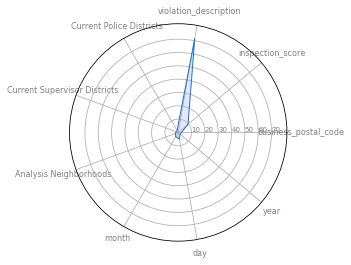

In [77]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# number of variable
categories=list(COLUMNS)#['pclass', 'sex', 'age', 'sibsp', 'parch']
N = len(categories)
print(categories)

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=list(np.array(IMPs) * 100) #[2.48, 9.63, 13.97, 5.84, 5.46]
print(values)
values += values[:1]
print(values)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
print(angles)
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30,40,50, 60, 70], ["10","20","30", "40", "50", "60", "70"], color="grey", size=7)
plt.ylim(0,max(values) + 10)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

# Show the graph
plt.show()

In [78]:
df_full.to_csv("restuarant_subset.csv")